<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Classificação-Multi-Classe" data-toc-modified-id="Classificação-Multi-Classe-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Classificação Multi-Classe</a></span><ul class="toc-item"><li><span><a href="#Lendo-e-Explorando-os-Dados" data-toc-modified-id="Lendo-e-Explorando-os-Dados-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Lendo e Explorando os Dados</a></span></li><li><span><a href="#Visualizando-os-Dados" data-toc-modified-id="Visualizando-os-Dados-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Visualizando os Dados</a></span></li><li><span><a href="#Função-Custo" data-toc-modified-id="Função-Custo-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Função Custo</a></span></li><li><span><a href="#Nova-Abordagem-Binária" data-toc-modified-id="Nova-Abordagem-Binária-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Nova Abordagem Binária</a></span><ul class="toc-item"><li><span><a href="#Função-Custo" data-toc-modified-id="Função-Custo-1.4.1"><span class="toc-item-num">1.4.1&nbsp;&nbsp;</span>Função Custo</a></span></li><li><span><a href="#Gradiente" data-toc-modified-id="Gradiente-1.4.2"><span class="toc-item-num">1.4.2&nbsp;&nbsp;</span>Gradiente</a></span></li><li><span><a href="#Otimizando-Modelo" data-toc-modified-id="Otimizando-Modelo-1.4.3"><span class="toc-item-num">1.4.3&nbsp;&nbsp;</span>Otimizando Modelo</a></span></li></ul></li><li><span><a href="#Classificador-Multi-Classe" data-toc-modified-id="Classificador-Multi-Classe-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Classificador Multi Classe</a></span></li><li><span><a href="#Predizendo-e-Medindo-Performance" data-toc-modified-id="Predizendo-e-Medindo-Performance-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Predizendo e Medindo Performance</a></span></li></ul></li></ul></div>

Este notebook tem por objetivo alocar o desenvolvimento do ```exercicio 3``` proposto pelo curso de Aprendizagem Automática. Na primeira parte do exercício, será implementado o algoritmo de Regressão Logística com várias classes (one vs all). Na segunda parte do exercício, é encontrado um problema onde será necessária a utilização de um modelo de Redes Neurais

## Classificação Multi-Classe

Em ambas as partes, o problema de negócio é o mesmo: aplicar classificação a um dataset contendo dígitos manuscritos de 0 a 9. Neste primeiro momento, o problema será resolvido através do algoritmo de ```Regressão Logística```.

### Lendo e Explorando os Dados

In [1]:
# Importando biblioteca e lendo arquivo
import numpy as np
import scipy.io as sio

# Lendo arquivo
data = sio.loadmat('ex3data1.mat')

Fonte: [scipy.io.loadmat()](https://docs.scipy.org/doc/scipy/reference/generated/scipy.io.loadmat.html)

In [2]:
# Verificando resultado
data

{'X': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 '__globals__': [],
 '__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Oct 16 13:09:09 2011',
 '__version__': '1.0',
 'y': array([[10],
        [10],
        [10],
        ...,
        [ 9],
        [ 9],
        [ 9]], dtype=uint8)}

In [3]:
# Separando em partes
X = data['X']
y = data['y']

In [4]:
# Verificando dimensões
print(f'Dimensões do dataset: {X.shape}')
print(f'Labels: {y.shape}')

Dimensões do dataset: (5000, 400)
Labels: (5000, 1)


Temos 5000 linhas e 400 features! Realmente trata-se de um dataset de imagens (provavelmente 20 x 20 pixels). Cada feature representa a intensidade de um pixel referente a imagem, variando de 0 a 255.

### Visualizando os Dados

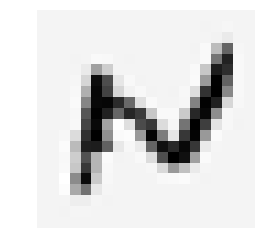

In [5]:
# Visualizando os dados
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

digito = X[2500]
imagem_digito = digito.reshape(20, 20)
plt.imshow(imagem_digito, cmap=matplotlib.cm.binary, interpolation='nearest')
plt.axis('off')
plt.show()

Mas que imagem seria essa? Vamos verificar seu label

In [6]:
# Label
y[2500]

array([5], dtype=uint8)

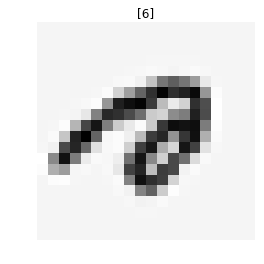

In [7]:
# Verificando outro digito
digito = X[3000]
imagem_digito = digito.reshape(20, 20)
plt.imshow(imagem_digito, cmap=matplotlib.cm.binary, interpolation='nearest')
label = y[3000]
plt.axis('off')
plt.title(label)
plt.show()

Aparentemente as imagens estão invertidas!?

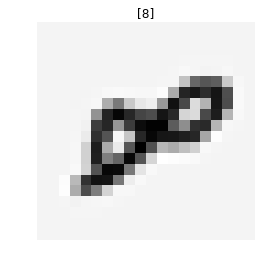

In [8]:
# Outra tentativa
digito = X[4000]
imagem_digito = digito.reshape(20, 20)
plt.imshow(imagem_digito, cmap=matplotlib.cm.binary, interpolation='nearest')
label = y[4000]
plt.axis('off')
plt.title(label)
plt.show()

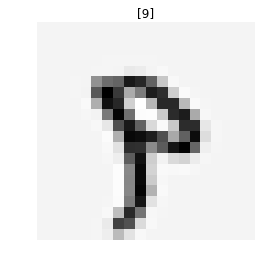

In [9]:
# Tentando após pesquisas
from scipy import ndimage

digito = X[4500]
imagem_digito = digito.reshape(20, 20)
plt.imshow(ndimage.rotate(imagem_digito, -90), cmap=matplotlib.cm.binary, 
           interpolation='nearest')
label = y[4500]
plt.axis('off')
plt.title(label)
plt.show()

Fonte: [scipy.ndimage.rotate](https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.rotate.html) não surtiu efeito.

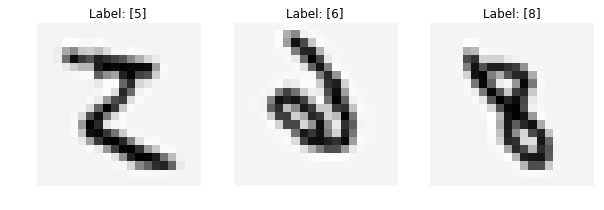

In [10]:
# Verificando para os demais
i = 0
digitos = [2500, 3000, 4000]
fig, ax = plt.subplots(1, 3, figsize=(10, 3))
for axe in ax:
    digito = X[digitos[i]]
    imagem_digito = digito.reshape(20, 20)
    axe.imshow(ndimage.rotate(imagem_digito, -90), cmap=matplotlib.cm.binary,
              interpolation='nearest')
    label = y[digitos[i]]
    axe.set_title(f'Label: {label}')
    axe.axis('off')
    i+=1
plt.show()

Ao que tudo indica, as imagens não estavam simplismente rotacionadas, mas sim ```espelhadas!```.  Como consertar?

In [11]:
# Pesquisas
from PIL import Image

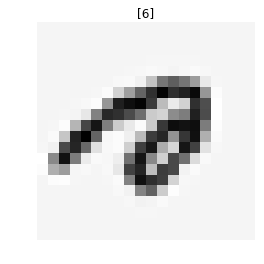

In [12]:
digito = X[3000]
rotated_image = digito.transpose(Image.FLIP_LEFT_RIGHT)
imagem_digito = digito.reshape(20, 20)
plt.imshow(imagem_digito, cmap=matplotlib.cm.binary, interpolation='nearest')
label = y[3000]
plt.axis('off')
plt.title(label)
plt.show()

Fonte: [PIL.Image](https://www.blog.pythonlibrary.org/2017/10/05/how-to-rotate-mirror-photos-with-python/) não surtiu efeito.

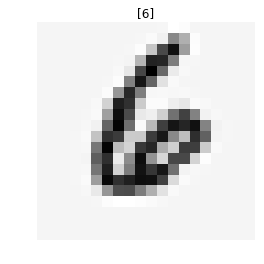

In [13]:
# Mais uma tentativa
digito = X[3000]
imagem_digito = digito.reshape(20, 20).T
plt.imshow(imagem_digito, cmap=matplotlib.cm.binary, interpolation='nearest')
label = y[3000]
plt.axis('off')
plt.title(label)
plt.show()

Opa! Será!?

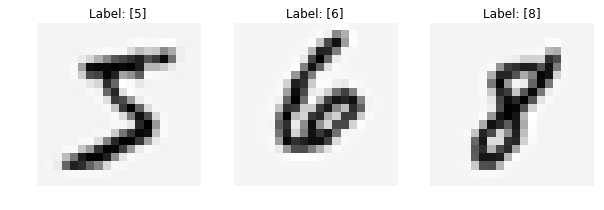

In [14]:
# Verificando para os demais
i = 0
digitos = [2500, 3000, 4000]
fig, ax = plt.subplots(1, 3, figsize=(10, 3))
for axe in ax:
    digito = X[digitos[i]]
    imagem_digito = digito.reshape(20, 20).T
    axe.imshow(imagem_digito, cmap=matplotlib.cm.binary,
              interpolation='nearest')
    label = y[digitos[i]]
    axe.set_title(f'Label: {label}')
    axe.axis('off')
    i+=1
plt.show()

__Perfeito!__ Compartilhando suspeita:

Como a imagem estava espelhada, a suspeita levantada era que, de alguma forma, os dados das colunas estavam localizados nas linhas da matriz que representa a imagem (e vice e versa). Em outras palavras, significa dizer que os pixels brilhantes que deveriam estar nas colunas, estavam nas linhas, assim como os pixels brilhantes que estavam nas linhas, deveriam estar nas colunas.

Para confirmar a suspeita, foi aplicada uma transposição na matriz da imagem após o ```.reshape(20, 20)```, transformando o que é linha, em coluna e o que é coluna, em linha.

__Plotando grid de imagens:__

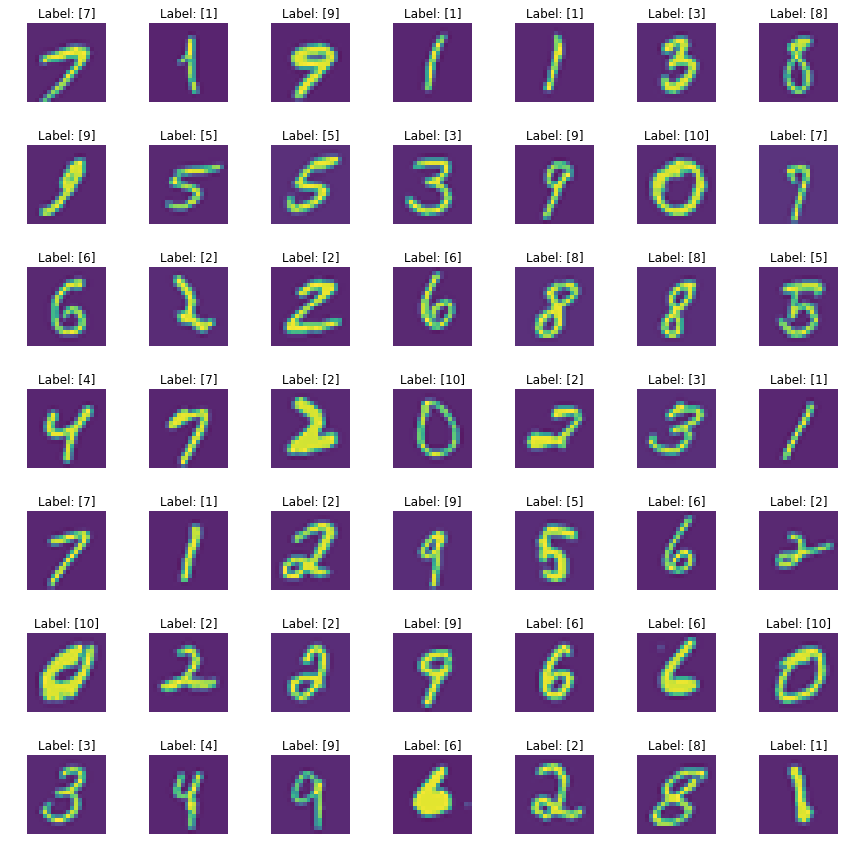

In [15]:
# settings
h, w = 10, 10        # for raster image
nrows, ncols = 7, 7  # array of sub-plots
figsize = [12, 12]     # figure size, inches

# prep (x,y) for extra plotting on selected sub-plots
xs = np.linspace(0, 2*np.pi, 60)  # from 0 to 2pi
ys = np.abs(np.sin(xs))           # absolute of sine

# create figure (fig), and array of axes (ax)
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize)

# plot simple raster image on each sub-plot
for i, axi in enumerate(ax.flat):
    # i runs from 0 to (nrows*ncols-1)
    # axi is equivalent with ax[rowid][colid]
    rnd = np.random.randint(0, 5000)
    img = X[rnd].reshape(20, 20).T
    axi.imshow(img, alpha=0.9)
    # get indices of row/column
    rowid = i // ncols
    colid = i % ncols
    # write row/col indices as axes' title for identification
    #axi.set_title("Row:"+str(rowid)+", Col:"+str(colid))
    label = y[rnd]
    axi.set_title(f'Label: {label}')
    axi.axis('off')

# one can access the axes by ax[row_id][col_id]
# do additional plotting on ax[row_id][col_id] of your choice
#ax[0][2].plot(xs, 3*ys, color='red', linewidth=3)
#ax[4][3].plot(ys**2, xs, color='green', linewidth=3)

plt.tight_layout(True)
plt.show()

### Função Custo

Como sempre, antes de definir a função custo, vamos definir a função sigmoidal

In [16]:
# Definindo função sigmoidal
def sigmoid(z):
    """Função sigmoidal para cálculo da função hyothesis
    Input: 
        z: X.dot(theta)
    Output:
        h = função sigmoidal"""
    return 1 / (1 + np.exp(-z))

In [17]:
# Testando
[m, n] = X.shape
theta_inicial = np.zeros((n, 1))
theta_inicial.shape

(400, 1)

In [18]:
# Calculando z
z = X.dot(theta_inicial)
h = sigmoid(z)
h[:5]

array([[0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5]])

__Função Custo__:

\begin{equation*}
    J(\theta)=\frac{1}{m}\sum_{i=1}^{m}\left[-y^{(i)}\log{(h_\theta(x^{(i)}))} -
              (1 - y^{(i)})\log{(1-h_\theta(x^{(i)}))}\right]
\end{equation*}

In [19]:
# Termo 1
termo1 = np.log(h).T.dot(-y)
termo1

array([[-868166.84365133]])

In [20]:
# Termo 2
termo2 = np.log(1 - h).T.dot(1 - y)
termo2

array([[-782909.74044246]])

In [21]:
termo1 - termo2

array([[-85257.10320887]])

Já é possível identificar um problema: y varia de 1 a 10. Não queremos isso.

In [22]:
# Valores únicos do array
np.unique(y)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=uint8)

In [23]:
# Verificando primeiras linhas
y[:5]

array([[10],
       [10],
       [10],
       [10],
       [10]], dtype=uint8)

In [24]:
y_reshaped = y.reshape(-1)
y_reshaped

array([10, 10, 10, ...,  9,  9,  9], dtype=uint8)

In [25]:
# Verificando se é um 0
y_mod = (y_reshaped == 10)
y_mod[:5]

array([ True,  True,  True,  True,  True])

In [26]:
# Multiplicando por 1
y_mod * 1

array([1, 1, 1, ..., 0, 0, 0])

In [27]:
# Testando um procedimento já realizado
bias = np.ones((m, 1))
np.c_[(bias, y_mod)]

array([[1., 1.],
       [1., 1.],
       [1., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [28]:
# Testando pra mais de uma concatenação
zeros = np.zeros((m, 1))
np.c_[(zeros, bias, y_mod)]

array([[0., 1., 1.],
       [0., 1., 1.],
       [0., 1., 1.],
       ...,
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.]])

In [29]:
# Realizando o procedimento para todas as classes
y_10 = (y_reshaped == 10)
y_9 = (y_reshaped == 9)
stack = np.c_[(y_9, y_10)]

for i in range(len(np.unique(y))-2, 0, -1):
    y_i = (y_reshaped == i)
    stack = np.c_[(y_i, stack)]

In [30]:
y_encoded = stack * 1
y_encoded

array([[0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       ...,
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 1, 0]])

In [31]:
# Verificando últimas linhas de y
y[:-5]

array([[10],
       [10],
       [10],
       ...,
       [ 9],
       [ 9],
       [ 9]], dtype=uint8)

In [32]:
# Verificando novo shape
y_encoded.shape

(5000, 10)

In [33]:
# Verificando dados
X.shape

(5000, 400)

In [34]:
# Adicionando termo bias
m = X.shape[0]
bias = np.ones((m))
X_train = np.c_[(bias, X)]

# Nova matriz de parâmetros
n = X_train.shape[1]
labels = y_encoded.shape[1]
all_theta = np.zeros((labels, n))

In [35]:
# Verificando
all_theta.shape

(10, 401)

In [36]:
# X após bias
X_train.shape

(5000, 401)

In [37]:
# Labels
y_encoded.shape

(5000, 10)

In [38]:
# Testando previsão
X_train.dot(all_theta.T)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [39]:
# Dimensões
X_train.dot(all_theta.T).shape

(5000, 10)

In [40]:
# Testando termos da função custo
y_encoded - X_train.dot(all_theta.T)

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [42]:
h = sigmoid(X_train.dot(all_theta.T))
np.log(h).T.dot(-y)

array([[-868166.84365132],
       [-868166.84365132],
       [-868166.84365132],
       [-868166.84365132],
       [-868166.84365132],
       [-868166.84365132],
       [-868166.84365132],
       [-868166.84365132],
       [-868166.84365132],
       [-868166.84365132]])

\begin{equation*}
    J(\theta)=\frac{1}{m}\sum_{i=1}^{m}\left[-y^{(i)}\log{(h_\theta(x^{(i)}))} -
              (1 - y^{(i)})\log{(1-h_\theta(x^{(i)}))}\right]
\end{equation*}

In [43]:
np.log(1 - h).T.dot(1 - y)

array([[-782909.74044243],
       [-782909.74044243],
       [-782909.74044243],
       [-782909.74044243],
       [-782909.74044243],
       [-782909.74044243],
       [-782909.74044243],
       [-782909.74044243],
       [-782909.74044243],
       [-782909.74044243]])

In [44]:
#!/usr/local/Cellar/python/2.7.6/bin/python
# -*- coding: utf-8 -*-

import sys

import scipy.misc, scipy.optimize, scipy.io, scipy.special
from numpy import *

def sigmoid( z ):
	return scipy.special.expit(z)
	# return 1.0 / (1.0 + exp( -z ))

def computeCost( theta, X, y, lamda ):
	m = shape( X )[0]
	hypo 	   = sigmoid( X.dot( theta ) )
	term1 	   = log( hypo ).dot( -y )
	term2 	   = log( 1.0 - hypo ).dot( 1 - y )
	left_hand  = (term1 - term2) / m
	right_hand = theta.T.dot( theta ) * lamda / (2*m)
	return left_hand + right_hand

def gradientCost( theta, X, y, lamda ):
	m = shape( X )[0]
	grad = X.T.dot( sigmoid( X.dot( theta ) ) - y ) / m
	grad[1:] = grad[1:] + ( (theta[1:] * lamda ) / m )
	return grad

def oneVsAll( X, y, num_classes, lamda ):
	m,n 		= shape( X )
	X 			= c_[ones((m, 1)), X]
	all_theta 	= zeros((n+1, num_classes))

	for k in range(0, num_classes):
		theta 			= zeros(( n+1, 1 )).reshape(-1)
		temp_y 			= ((y == (k+1)) + 0).reshape(-1)
		result 			= scipy.optimize.fmin_cg( computeCost, fprime=gradientCost, x0=theta, \
												  args=(X, temp_y, lamda), maxiter=50, disp=False, full_output=True )
		all_theta[:, k] = result[0]
		print("%d Cost: %.5f" % (k+1, result[1]))

	# save( "all_theta.txt", all_theta )
	return all_theta

def predictOneVsAll( theta, X, y ):
	m,n = shape( X )
	X 	= c_[ones((m, 1)), X]

	correct = 0
	for i in range(0, m ):
		prediction 	= argmax(theta.T.dot( X[i] )) + 1
		actual 		= y[i]
		# print "prediction = %d actual = %d" % (prediction, actual)
		if actual == prediction:
			correct += 1
	print("Accuracy: %.2f%%" % (correct * 100.0 / m ))

	
def part1_1():
	mat = scipy.io.loadmat('ex3data1.mat')
	X, y = mat['X'], mat['y']
	
def part1_2():
	mat = scipy.io.loadmat('ex3data1.mat')
	X, y = mat['X'], mat['y']

def part1_3():
	mat = scipy.io.loadmat('ex3data1.mat')
	X, y = mat['X'], mat['y']
	m, n = shape( X )
	input_layer_size = 400
	num_labels 		 = 10
	lamda 			 = 0.1

	theta = oneVsAll( X, y, num_labels, lamda )

def part1_4():
	mat = scipy.io.loadmat('ex3data1.mat')
	X, y 			 = mat['X'], mat['y']
	m, n 			 = shape( X )
	input_layer_size = 400
	num_labels 		 = 10
	lamda 			 = 0.1

	theta = oneVsAll( X, y, num_labels, lamda )
	predictOneVsAll( theta, X, y )



def main():
	set_printoptions(precision=6, linewidth=200)
	part1_1()
	part1_2()
	part1_3()
	part1_4()
	
if __name__ == '__main__':
	main()

1 Cost: 0.01517
2 Cost: 0.05689
3 Cost: 0.06408
4 Cost: 0.03721
5 Cost: 0.06125
6 Cost: 0.02077
7 Cost: 0.03378
8 Cost: 0.08479
9 Cost: 0.07967
10 Cost: 0.01046
1 Cost: 0.01517
2 Cost: 0.05689
3 Cost: 0.06408
4 Cost: 0.03721
5 Cost: 0.06125
6 Cost: 0.02077
7 Cost: 0.03378
8 Cost: 0.08479
9 Cost: 0.07967
10 Cost: 0.01046
Accuracy: 95.06%


In [45]:
y

array([[10],
       [10],
       [10],
       ...,
       [ 9],
       [ 9],
       [ 9]], dtype=uint8)

In [46]:
temp_y = ((y == (+1)) + 0).reshape(-1)

In [47]:
temp_y[1000]

0

In [48]:
theta = np.zeros((n, 1)).reshape(-1)
theta.shape

(401,)

In [49]:
z = X_train.dot(theta)
h = sigmoid(z)
h.shape

(5000,)

\begin{equation*}
    J(\theta)=\frac{1}{m}\sum_{i=1}^{m}\left[-y^{(i)}\log{(h_\theta(x^{(i)}))} -
              (1 - y^{(i)})\log{(1-h_\theta(x^{(i)}))}\right]
\end{equation*}

In [50]:
t1 = np.log(h).T.dot(-y)
t1

array([-868166.843651])

In [51]:
t2 = np.log(1 - h).T.dot(1 - y)
t2

array([-782909.740442])

In [ ]:
def computeCost( theta, X, y, lamda ):
	m = shape( X )[0]
	hypo 	   = sigmoid( X.dot( theta ) )
	term1 	   = log( hypo ).dot( -y )
	term2 	   = log( 1.0 - hypo ).dot( 1 - y )
	left_hand  = (term1 - term2) / m
	right_hand = theta.T.dot( theta ) * lamda / (2*m)
	return left_hand + right_hand

def gradientCost( theta, X, y, lamda ):
	m = shape( X )[0]
	grad = X.T.dot( sigmoid( X.dot( theta ) ) - y ) / m
	grad[1:] = grad[1:] + ( (theta[1:] * lamda ) / m )
	return grad

In [ ]:
def oneVsAll( X, y, num_classes, lamda ):
	m,n 		= shape( X )
	X 			= c_[ones((m, 1)), X]
	all_theta 	= zeros((n+1, num_classes))

	for k in range(0, num_classes):
		theta 			= zeros(( n+1, 1 )).reshape(-1)
		temp_y 			= ((y == (k+1)) + 0).reshape(-1)
		result 			= scipy.optimize.fmin_cg( computeCost, fprime=gradientCost, x0=theta, \
												  args=(X, temp_y, lamda), maxiter=50, disp=False, full_output=True )
		all_theta[:, k] = result[0]
		print("%d Cost: %.5f" % (k+1, result[1]))

	# save( "all_theta.txt", all_theta )
	return all_theta

### Nova Abordagem Binária

Definindo função custo regularizada:

\begin{equation*}
    J(\theta)=\frac{1}{m}\sum_{i=1}^{m}\left[-y^{(i)}\log{(h_\theta(x^{(i)}))} -
              (1 - y^{(i)})\log{(1-h_\theta(x^{(i)}))}\right]
              + \frac{\lambda}{2m}\sum_{j=1}^{n}\theta_j^2
\end{equation*}

In [52]:
# Dados brutos de entrada
data = sio.loadmat('ex3data1.mat')

X = data['X']
y = data['y']

print(f'Dimensões de X: {X.shape}')
print(f'Dimensões de y: {y.shape}')

Dimensões de X: (5000, 400)
Dimensões de y: (5000, 1)


In [53]:
# Header de y
y

array([[10],
       [10],
       [10],
       ...,
       [ 9],
       [ 9],
       [ 9]], dtype=uint8)

Para conseguir resultados efetivos através da métodologia ```One vs All```, vamos treinar um número ```k``` de classificadores de acordo com a quantidade ```K``` de labels possíveis. Neste caso, temos 10 classes diferentes (numerais de 0 a 10) e, portanto, vamos realizar o procedimento de treino para 10 possíveis casos.

In [54]:
# Testando para y = 1
y1 = (y == 1) * 1
y1

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [55]:
# Aplicando reshape
y1 = y1.reshape(-1)
y1.shape

(5000,)

Agora temos um vetor de 5000 elementos, onde o 1 identifica os index onde o label é igual a classe (1, no caso)

In [56]:
# Procurando y = 1
y1[450:550]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

Vamos considerar uma matriz de theta para este classificador binário.

In [57]:
# Adicionando bias
X_train = np.c_[(np.ones((m, 1)), X)]

# Matriz de theta
[m, n] = X_train.shape
theta1 = np.zeros((n, 1))
theta1 = theta1.reshape(-1)
theta1.shape

(401,)

Agora sim podemos calcular nossa função custo seguindo os meios normais!

In [58]:
# Calculando hypothesis
z = X_train.dot(theta)
h = sigmoid(z)
h.shape

(5000,)

In [59]:
# Verificnado
h[:5]

array([0.5, 0.5, 0.5, 0.5, 0.5])

\begin{equation*}
    J(\theta)=\frac{1}{m}\sum_{i=1}^{m}\left[-y^{(i)}\log{(h_\theta(x^{(i)}))} -
              (1 - y^{(i)})\log{(1-h_\theta(x^{(i)}))}\right]
              + \frac{\lambda}{2m}\sum_{j=1}^{n}\theta_j^2
\end{equation*}

In [60]:
# Calculando custo
lamda = 0.1
termo1 = np.log(h).T.dot(-y)
termo2 = np.log(1 - h).T.dot(1 - y)
unreg = termo1 - termo2
reg = (lamda/(2*m)) * theta.T.dot(theta)

J = unreg + reg

Para cada uma das classes, devemos:
    - Indexar corretamente o vetor y para uma única classe;
    - Criar um vetor de parâmetros específico considerando uma única classe;
    - Minimizar a função custo para obter os melhores parâmetros;
    - Finalizar treinamento do classificador binário;
    - Adicionar os parâmetros theta a uma matriz all_theta que irá contemplar todas as classes.

Para concluir os passos acima e, considerando ```K``` classificadores binários, devemos:
    - Definir uma função que compute o Custo;
    - Definir uma função que compute o Gradiente;
    - Definir uma função para minimizar o Custo e obter os melhores theta;
    - Definir uma função que englobe tudo isso.

#### Função Custo

\begin{equation*}
    J(\theta)=\frac{1}{m}\sum_{i=1}^{m}\left[-y^{(i)}\log{(h_\theta(x^{(i)}))} -
              (1 - y^{(i)})\log{(1-h_\theta(x^{(i)}))}\right]
              + \frac{\lambda}{2m}\sum_{j=1}^{n}\theta_j^2
\end{equation*}

In [123]:
def costFunction(theta, X, y, lamda):
    """ Função responsável por cálcular o custo de um treinamento,
    considerando um classificador binário de dígitos (K = 1)
    Input:
        theta: vetor de parâmetros de dimensões nx1 (classe única já indexada)
        X: dataset de dimensões mxn
        y: vetor de labels de dimensões mx1 (classe única já indexada)
        lamda: fator de regularização
    Output:
        J: custo do treinamento com os parâmetros indicados"""
    
    # Retornando variáveis de dimensão
    [m, n] = X.shape
    
    # Calculando hypothesis
    z = X.dot(theta)
    h = sigmoid(z)
    
    # Calculando custo
    termo1 = np.log(h).T.dot(y * (-1))
    termo2 = np.log(1 - h).T.dot(1 - y)
    unreg = termo1 - termo2
    reg = theta.T.dot(theta)
    
    return (unreg + reg) / m

In [94]:
# Testando para um classificar binário (digito = 1)
m = X.shape[0]
X_train = np.c_[(np.ones((m, 1)), X)]
n = X_train.shape[1]
y1 = ((y == 1) * 1).reshape(-1)
theta = np.zeros((n, 1)).reshape(-1)
lamda = 0.1

print(f'Dimensões de X_train: {X_train.shape}')
print(f'Dimensões de y1: {y1.shape}')
print(f'Primeiras linhas de y: {y1[:15]}')
print(f'Dimensões de theta: {theta.shape}')

Dimensões de X_train: (5000, 401)
Dimensões de y1: (5000,)
Primeiras linhas de y: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Dimensões de theta: (401,)


In [95]:
# Chamando função custo
J = costFunction(theta, X_train, y1, lamda)
print(f'Custo calculado: {J}')

Custo calculado: 0.6931471805599453


Antes de tomar qualquer conclusão, vamos calcular o gradiente e uma função de minimização.

#### Gradiente

\begin{equation*}
    \frac{\partial J(\theta)}{\partial\theta_j} = 
        \begin{cases} 
            \left(\frac{1}{m}\sum_{i=1}^m(h_\theta(x^{(i)})-y^{(i)})x_j^{(i)}\right)
                & \mbox{para } j\mbox{ = 0} \\
            \left(\frac{1}{m}\sum_{i=1}^m(h_\theta(x^{(i)})-y^{(i)})x_j^{(i)}\right) +
            \frac{\lambda}{m}\theta_j &\mbox{para } j\mbox{ >= 1}
        \end{cases}
\end{equation*}  

In [128]:
def gradient(theta, X, y, lamda):
    """ Função responsável por cálcular o gradiente (derivadas parciais)
    Input:
        theta: vetor de parâmetros de dimensão nx1
        X: features de dimensões mxn
        y: vetor de labels de dimensão mx1
        lamda: fator de regularização
    Output:
        grad: vetor de gradiente com todas as derivadas parciais (nx1)"""
    
    # Dimensões
    [m, n] = X.shape
    
    # Calculando gradiente
    z = X.dot(theta)
    h = sigmoid(z)
    grad = X.T.dot(h - y)
    grad[1:] = grad[1:] + (lamda/m)*theta[1:]
    
    return grad

In [129]:
# Testando
grad = gradient(theta, X_train, y1, lamda)

In [130]:
# Verificando erro
grad

array([ 2.000000e+03,  0.000000e+00,  0.000000e+00, -3.872651e-04,  2.458648e-03, -1.164701e-03,  2.984533e-01,  3.009640e-01,  5.768387e-02,  5.077351e-02,  1.090396e-01,  3.525355e-02,
       -2.711668e-02, -5.876744e-02, -1.043973e-01, -1.633717e-01, -1.179166e-01, -3.428309e-02, -2.318495e-04,  3.659450e-04,  0.000000e+00,  1.234001e-04, -1.050177e-03,  5.164639e-03,
       -9.293038e-02, -1.603880e-01,  4.210963e-01,  1.403214e+00,  2.035603e+00,  1.770619e+00,  6.711758e-01, -2.544750e-01, -5.341581e-01, -6.089224e-01, -7.218186e-01, -2.364683e-01,
       -2.408007e-02, -1.275915e-01, -1.350698e-01, -1.947951e-02, -4.429466e-03, -1.058610e-03,  1.148088e-02, -4.547858e-02,  2.353046e-01,  2.030169e+00,  7.085653e+00,  1.210085e+01,
        1.362964e+01,  1.014235e+01,  4.919109e+00,  3.149471e+00,  3.054058e+00,  8.242045e+00,  1.977360e+01,  2.523262e+01,  1.528244e+01,  4.861497e+00,  1.349668e+00, -5.223184e-02,
        1.578679e-02, -4.422862e-03,  1.585427e-03,  1.061581e-01

Aparentemente funcionou bem. Vamos verificar as dimensões do gradiente.

In [131]:
# Dimensões
grad.shape

(401,)

#### Otimizando Modelo

Nos dois últimos problemas realizados até aqui, utilizamos os módulos:
    - scipy.optimize.fmin()
    - scipy.optimize.minimize()

Para este problema, vamos utilizar o módulo
    - scipy.optimize.fmin_cg()
    
Fonte: [fmin_cg()](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fmin_cg.html)

In [132]:
# Importando módulo
from scipy import optimize

In [133]:
# Verificando argumentos
help(optimize.fmin_cg)

Help on function fmin_cg in module scipy.optimize.optimize:

fmin_cg(f, x0, fprime=None, args=(), gtol=1e-05, norm=inf, epsilon=1.4901161193847656e-08, maxiter=None, full_output=0, disp=1, retall=0, callback=None)
    Minimize a function using a nonlinear conjugate gradient algorithm.
    
    Parameters
    ----------
    f : callable, ``f(x, *args)``
        Objective function to be minimized.  Here `x` must be a 1-D array of
        the variables that are to be changed in the search for a minimum, and
        `args` are the other (fixed) parameters of `f`.
    x0 : ndarray
        A user-supplied initial estimate of `xopt`, the optimal value of `x`.
        It must be a 1-D array of values.
    fprime : callable, ``fprime(x, *args)``, optional
        A function that returns the gradient of `f` at `x`. Here `x` and `args`
        are as described above for `f`. The returned value must be a 1-D array.
        Defaults to None, in which case the gradient is approximated
        numeri

In [134]:
# Vejamos
result = scipy.optimize.fmin_cg(computeCost, fprime=gradient, x0=theta,
                               args=(X_train, y1, lamda), maxiter=50,
                               disp=False, full_output=True)

In [135]:
# Verificando
result

(array([-2.976817e+00,  0.000000e+00,  0.000000e+00,  4.743128e-05, -4.374885e-04, -4.836378e-04,  5.123529e-04, -8.032833e-03,  2.064173e-03,  1.647083e-04,  4.781605e-04,  1.060046e-04,
         1.049490e-04,  3.733127e-04,  9.436163e-04,  5.024946e-03,  6.838518e-03,  5.758627e-04, -9.716843e-05, -1.284984e-07,  0.000000e+00, -3.290121e-08,  7.424094e-06, -6.178454e-04,
         4.899800e-03,  5.713410e-03,  1.233673e-03, -1.062939e-02,  1.946698e-03, -2.805185e-03, -9.091439e-03, -1.308430e-03, -7.696247e-04, -3.184170e-03, -4.638094e-03, -4.796835e-02,
        -6.814750e-02,  2.833493e-05,  4.839162e-03,  3.241187e-04,  1.420261e-04,  2.710534e-07, -1.396212e-04,  2.522784e-04,  1.244707e-02,  2.486628e-02,  3.318417e-02,  3.348459e-02,
        -4.796570e-02, -6.568554e-02, -2.630016e-02, -2.513165e-02, -2.189829e-03, -1.848592e-02, -1.542909e-01, -2.963157e-01, -2.610054e-01, -7.903695e-02,  2.648305e-02, -6.196077e-05,
        -6.713749e-04,  1.257922e-06,  3.835117e-04,  3.5728

In [137]:
# Interpretando resultado
theta = result[0]
cost = result[1]

print(f'Cost: {cost}')
print(f'Theta shape: {theta.shape}')

Cost: 0.01635050622036764
Theta shape: (401,)


### Classificador Multi Classe

Após o aparente sucesso na classificação binária, vamos expandir os cálculos para todas as classes.

In [142]:
# Retornando parâmetros
[m, n] = X_train.shape
lamda = 0.1
num_classes = 10
all_theta = np.zeros((n, num_classes))

for k in range(1, num_classes+1):
    theta = np.zeros((n, 1)).reshape(-1)
    y_class = ((y == k) * 1).reshape(-1)
    result = scipy.optimize.fmin_cg(computeCost, fprime=gradient, x0=theta,
                               args=(X_train, y_class, lamda), maxiter=50,
                               disp=False, full_output=True)
    all_theta[:, k-1] = result[0]
    print(f'Custo classe {k}: {result[1]}')

Custo classe 1: 0.01635050622036764
Custo classe 2: 0.05723545648365058
Custo classe 3: 0.062027568038251164
Custo classe 4: 0.03746326453019381
Custo classe 5: 0.06127988762752769
Custo classe 6: 0.022219525972190728
Custo classe 7: 0.03499951651049976
Custo classe 8: 0.08473976821922251
Custo classe 9: 0.08085955670177353
Custo classe 10: 0.011685368513978143


In [143]:
# Dimensões da matriz de theta
all_theta.shape

(401, 10)

In [144]:
# Encapsulando em uma função
def trainOneVsAll(X, y, num_classes, lamda):
    """Função responsável por realizar o treinamento utiliando o método One vs All
    Input:
        X: features de dimensões mxn+1
        y: vetor de labels de dimensões mx1
        num_classes: quantidade de classes do modelo
        lamda: fator de regularização"""
    
    # Criando matriz para alocar todos os num_classes vetores theta
    all_theta = np.zeros((n, num_classes))

    for k in range(1, num_classes+1):
        theta = np.zeros((n, 1)).reshape(-1)
        y_class = ((y == k) * 1).reshape(-1)
        result = scipy.optimize.fmin_cg(computeCost, fprime=gradient, x0=theta,
                                   args=(X_train, y_class, lamda), maxiter=50,
                                   disp=False, full_output=True)
        all_theta[:, k-1] = result[0]
        print(f'Custo classe {k}: {result[1]}')
    
    return all_theta

In [145]:
# Testando
full_theta = trainOneVsAll(X_train, y, 10, 0.1)
full_theta.shape

Custo classe 1: 0.01635050622036764
Custo classe 2: 0.05723545648365058
Custo classe 3: 0.062027568038251164
Custo classe 4: 0.03746326453019381
Custo classe 5: 0.06127988762752769
Custo classe 6: 0.022219525972190728
Custo classe 7: 0.03499951651049976
Custo classe 8: 0.08473976821922251
Custo classe 9: 0.08085955670177353
Custo classe 10: 0.011685368513978143


(401, 10)

### Predizendo e Medindo Performance

In [147]:
# Testando predições
y[2500]

5

In [149]:
# Predizendo um único elemento
full_theta.T.dot(X_train[2500])

array([-16.540549,  -9.767432,  -0.9958  , -17.21325 ,   0.391954, -11.495383,  -8.785016, -10.71215 ,  -8.692925, -12.631682])

In [150]:
# Qual o shape
full_theta.T.dot(X_train[2500]).shape

(10,)

O código acima indica que o índice do maior elemento desse vetor equivale a classe predita. Vejamos!

In [152]:
# Maior elemento
np.argmax(full_theta.T.dot(X_train[2500])) + 1

5

Devemos adicionar mais um, pois em Python a indexação começa por 0

Expandindo para todos os dados e contabilizando os acertos.

In [155]:
acertos = 0
for i in range(m):
    pred = np.argmax(full_theta.T.dot(X_train[i])) + 1
    if pred == y[i]:
        acertos += 1
print(f'Acertos: {acertos}')

Acertos: 4752


In [157]:
# Calculando acurácia
print(f'Acurácia: {100 * (acertos / m)}%')

Acurácia: 95.04%


In [158]:
# Encapsulando em uma função
def predictOneVsAll(X, y, theta):
    """Função responsável pela predição dos valores e cálculo da acurácia do modelo
    Input: 
        X: features nas dimensões mxn+1
        y: vetor de labels nas dimensões mx1
        theta: vetor de parâmetros (full_theta) nas dimensões nxnum_classes"""
    
    [m, n] = X.shape
    acertos = 0
    for i in range(m):
        pred = np.argmax(theta.T.dot(X_train[i])) + 1
        if pred == y[i]:
            acertos += 1
    acc = acertos / m
    return acc

In [160]:
# Testando
acc = predictOneVsAll(X_train, y, full_theta)
print(f'Acurácia final do modelo: {(100*acc):.2f}%')

Acurácia final do modelo: 95.04%
